### Heirarchical Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv(r"D:\sofronics\Datasets\Customers_spending.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x=df.iloc[:,[3,4]].values

In [6]:
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd

#calculate the Eucledean distance matrix
distance_matrix=euclidean_distances(x)

#convert the distance matrix to a datafrAME for better visualization
distance_df=pd.DataFrame(distance_matrix)

#optionally ,you can set row and column names for better interpretation
distance_df.columns=[f'Distance to point {i+1}' for i in range(distance_df.shape[1])]
distance_df.index=[f'point {i+1}' for i in range(distance_df.shape[1])]

distance_df

,Distance to point 1,Distance to point 2,Distance to point 3,Distance to point 4,Distance to point 5,Distance to point 6,Distance to point 7,Distance to point 8,Distance to point 9,Distance to point 10,...,Distance to point 191,Distance to point 192,Distance to point 193,Distance to point 194,Distance to point 195,Distance to point 196,Distance to point 197,Distance to point 198,Distance to point 199,Distance to point 200
point 1,0.000000,42.000000,33.015148,38.013156,2.236068,37.054015,33.136083,55.081757,36.221541,33.241540,...,89.442719,92.973114,102.786186,110.941426,107.489534,112.361025,111.543713,116.387285,123.794184,129.691943
point 2,42.000000,0.000000,75.006666,4.123106,41.048752,5.385165,75.059976,13.341664,78.102497,9.848858,...,105.394497,88.814413,122.200655,98.508883,123.490890,105.019046,123.004065,111.220502,137.306227,122.016392
point 3,33.015148,75.006666,0.000000,71.000000,34.014703,70.007142,2.000000,88.022724,4.242641,66.068147,...,88.645361,107.415083,97.020616,128.972865,104.479663,127.062977,112.178429,129.321305,121.593585,143.422453
point 4,38.013156,4.123106,71.000000,0.000000,37.013511,1.414214,71.028163,17.117243,74.060786,5.830952,...,102.396289,87.367042,119.037809,98.005102,120.569482,104.019229,120.420098,110.040901,134.617978,121.148669
point 5,2.236068,41.048752,34.014703,37.013511,0.000000,36.000000,34.014703,54.009258,37.054015,32.062439,...,87.664132,90.757920,101.192885,108.706026,105.759160,110.136279,109.658561,114.179683,122.000000,127.471565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
point 196,112.361025,105.019046,127.062977,104.019229,110.136279,103.043680,125.431256,103.097042,126.400158,101.242284,...,58.523500,19.723083,71.344236,13.892444,63.000000,0.000000,51.351728,7.810250,63.324561,17.464249
point 197,111.543713,123.004065,112.178429,120.420098,109.658561,119.100798,110.217966,126.570139,109.881755,115.693561,...,23.537205,47.010637,23.853721,64.327288,13.416408,51.351728,0.000000,46.000000,14.866069,56.089215
point 198,116.387285,111.220502,129.321305,110.040901,114.179683,109.018347,127.624449,109.836242,128.413395,107.018690,...,55.946403,23.537205,67.268120,21.400935,58.309519,7.810250,46.000000,0.000000,57.070132,14.212670
point 199,123.794184,137.306227,121.593585,134.617978,122.000000,133.281657,119.603512,141.198442,118.949569,129.769026,...,34.365681,61.294372,26.000000,76.843998,17.117243,63.324561,14.866069,57.070132,0.000000,65.000000


### Using dendogram to find the optimal numbers of clusters
    
   Linkage Methods:Linkage methods define how the distance between clusters is calculated when merging them in hierarchical clustering. 

   Ward's Method:Aims to minimize the variance within merged clusters is calculating the increase in the sum of squared distances from each data to the centroid of its new cluster when two clusters are merged

In [8]:
!pip install scipy

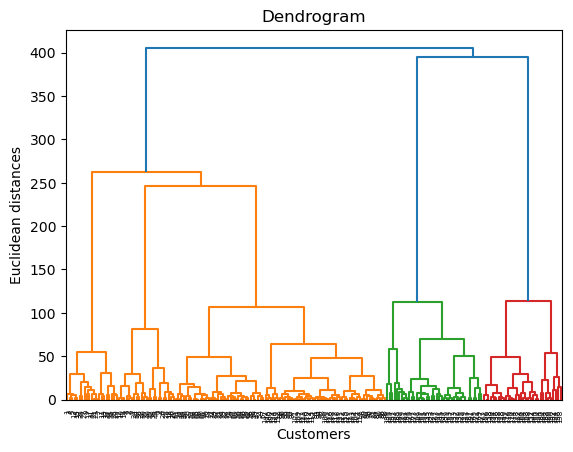

In [11]:
import scipy.cluster.hierarchy as sch
dendrogram= sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Training the Heirarchical Clustering model on the dataset

In [12]:
from sklearn.cluster import AgglomerativeClustering

#Initialize AgglomerativeClustering with the appropraite parameters
hc=AgglomerativeClustering(n_clusters=4,linkage='ward')

In [14]:
y_hc=hc.fit_predict(x)
y_hc

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

### Visualising the clusters

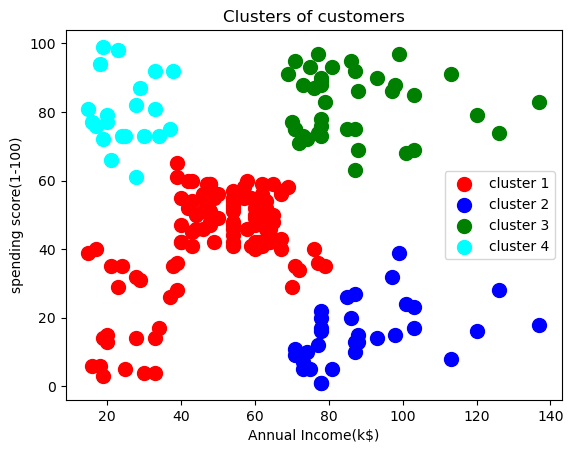

In [15]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red',label='cluster 1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='green',label='cluster 3')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c='cyan',label='cluster 4')

plt.title('Clusters of customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('spending score(1-100)')
plt.legend()
plt.show()
